### Task 1

 - Implement the XOR Boolean logic gate using perceptron Neural Network. 
 - Inputs = x1, x2 and bias, weights should be fed into the perceptron with single Output = y. Display final weights and bias of each perceptron. 
### Task 2
 Take the dataset of Penguin 
- Initialize a neural network with random weights. 
- Calculate output of Neural Network: \
    i.  Calculate squared error loss \
    ii. Update network parameter using batch Adaptive delta gradient descent optimizer function Implementation. \
    iii. Display updated weight and bias values \
    iv. Plot accuracy w.r.t. epoch values 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Task 1: XOR Gate Implementation

print("="*60)
print("TASK 1: XOR GATE USING PERCEPTRON")
print("="*60)

# XOR Truth Table:
# x1  x2  | y
# 0   0   | 0
# 0   1   | 1
# 1   0   | 1
# 1   1   | 0

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

print("\nXOR Truth Table:")
print("x1  x2  |  y")
print("-"*15)
for i in range(len(X)):
    print(f"{X[i][0]}   {X[i][1]}   |  {y[i]}")

# Step activation function
def step(z):
    return 1 if z >= 0 else 0

# For XOR, we need multiple perceptrons
# Perceptron 1: learns OR
# Perceptron 2: learns NAND
# Perceptron 3: learns AND of outputs from 1 and 2

print("\n" + "-"*60)
print("Training Perceptrons for XOR:")
print("-"*60)

# Initialize weights and bias for first two perceptrons
np.random.seed(42)
w1 = np.random.rand(2)
b1 = np.random.rand(1)
w2 = np.random.rand(2)
b2 = np.random.rand(1)
w3 = np.random.rand(2)
b3 = np.random.rand(1)

epochs = 100
learning_rate = 0.1

# Training for XOR decomposition
for epoch in range(epochs):
    total_error = 0
    for i in range(X.shape[0]):
        # First perceptron (OR-like)
        z1 = np.dot(w1, X[i]) + b1
        y1 = step(z1)
        
        # Second perceptron (NAND-like)
        z2 = np.dot(w2, X[i]) + b2
        y2 = step(z2)
        
        # Third perceptron (AND of y1 and y2)
        hidden = np.array([y1, y2])
        z3 = np.dot(w3, hidden) + b3
        y_pred = step(z3)
        
        # Errors
        error3 = y[i] - y_pred
        total_error += abs(error3)
        
        # Update third perceptron
        w3 += learning_rate * error3 * hidden
        b3 += learning_rate * error3
        
        # Backprop errors to first two perceptrons
        error1 = error3 * y2 * (1 if z1 >= 0 else 0)
        error2 = error3 * y1 * (1 if z2 >= 0 else 0)
        
        w1 += learning_rate * error1 * X[i]
        b1 += learning_rate * error1
        w2 += learning_rate * error2 * X[i]
        b2 += learning_rate * error2
    
    if total_error == 0:
        print(f"Converged at epoch {epoch + 1}")
        break

print("\n" + "="*60)
print("FINAL WEIGHTS AND BIASES FOR XOR PERCEPTRONS")
print("="*60)
print(f"\nPerceptron 1 (OR-like):")
print(f"  Weights: {w1}, Bias: {b1}")
print(f"\nPerceptron 2 (NAND-like):")
print(f"  Weights: {w2}, Bias: {b2}")
print(f"\nPerceptron 3 (AND of hidden):")
print(f"  Weights: {w3}, Bias: {b3}")

# Test XOR
print("\n" + "="*60)
print("Testing XOR Perceptrons:")
print("="*60)
print("x1  x2  | Predicted | Actual")
print("-"*35)
correct = 0
for i in range(len(X)):
    z1 = np.dot(w1, X[i]) + b1
    y1 = step(z1)
    z2 = np.dot(w2, X[i]) + b2
    y2 = step(z2)
    hidden = np.array([y1, y2])
    z3 = np.dot(w3, hidden) + b3
    y_pred = step(z3)
    print(f"{X[i][0]}   {X[i][1]}   |     {y_pred}     |   {y[i]}")
    if y_pred == y[i]:
        correct += 1

print(f"\nAccuracy: {correct}/{len(X)} = {(correct/len(X))*100:.0f}%")

TASK 1: XOR GATE USING PERCEPTRON

XOR Truth Table:
x1  x2  |  y
---------------
0   0   |  0
0   1   |  1
1   0   |  1
1   1   |  0

------------------------------------------------------------
Training Perceptrons for XOR:
------------------------------------------------------------

FINAL WEIGHTS AND BIASES FOR XOR PERCEPTRONS

Perceptron 1 (OR-like):
  Weights: [0.07454012 0.65071431], Bias: [0.33199394]

Perceptron 2 (NAND-like):
  Weights: [ 0.29865848 -0.14398136], Bias: [-0.24400548]

Perceptron 3 (AND of hidden):
  Weights: [-0.34191639  0.46617615], Bias: [0.20111501]

Testing XOR Perceptrons:
x1  x2  | Predicted | Actual
-----------------------------------
0   0   |     0     |   0
0   1   |     0     |   1
1   0   |     1     |   1
1   1   |     0     |   0

Accuracy: 3/4 = 75%


In [9]:
# Task 2: Penguin Dataset with AdaDelta Optimizer

print("\n\n" + "="*60)
print("TASK 2: PENGUIN DATASET WITH ADADELTA OPTIMIZER")
print("="*60)

# Load penguin dataset from CSV
penguins = pd.read_csv('/media/smayan/500GB SSD/Study/ML2/Practicals/Data/penguins.csv')

# Preprocessing
penguins = penguins.dropna()
X_penguin = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y_penguin = (penguins['species'] == 'Adelie').astype(int).values.reshape(-1, 1)

# Standardize
scaler_X = StandardScaler()
X_penguin = scaler_X.fit_transform(X_penguin)

print(f"\nDataset shape: X={X_penguin.shape}, y={y_penguin.shape}")
print(f"Classes: Adelie vs Others (Binary classification)")



TASK 2: PENGUIN DATASET WITH ADADELTA OPTIMIZER

Dataset shape: X=(333, 4), y=(333, 1)
Classes: Adelie vs Others (Binary classification)


In [10]:
# Initialize Neural Network
input_size = X_penguin.shape[1]
hidden_size = 8
output_size = 1

np.random.seed(42)

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

print("\nInitial Network Architecture:")
print(f"Input Layer: {input_size} neurons")
print(f"Hidden Layer: {hidden_size} neurons")
print(f"Output Layer: {output_size} neuron")

# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def sigmoid_derivative(a):
    return a * (1 - a)

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return A2, cache

# Calculate loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))
    return loss

# Backward pass
def backward_pass(X, y, cache, W1, W2):
    m = X.shape[0]
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']
    
    dZ2 = (A2 - y)
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (1 - A1 ** 2)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
    
    return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}


Initial Network Architecture:
Input Layer: 4 neurons
Hidden Layer: 8 neurons
Output Layer: 1 neuron


In [11]:
# AdaDelta Optimizer Implementation
def adadelta_optimizer(X, y, W1, b1, W2, b2, epochs=100, rho=0.95, epsilon=1e-7):
    """
    AdaDelta Optimizer - Adaptive Learning Rate Method
    Accumulates squared gradients and parameter updates
    """
    m = X.shape[0]
    
    # Initialize accumulators
    E_dW1 = np.zeros_like(W1)
    E_dW2 = np.zeros_like(W2)
    E_db1 = np.zeros_like(b1)
    E_db2 = np.zeros_like(b2)
    
    E_ΔW1 = np.zeros_like(W1)
    E_ΔW2 = np.zeros_like(W2)
    E_Δb1 = np.zeros_like(b1)
    E_Δb2 = np.zeros_like(b2)
    
    loss_history = []
    accuracy_history = []
    
    print("\nTraining with AdaDelta Optimizer...")
    print(f"Rho (decay rate): {rho}, Epsilon: {epsilon}")
    print("-" * 60)
    
    for epoch in range(epochs):
        # Forward pass on full batch
        y_pred, cache = forward_pass(X, W1, b1, W2, b2)
        
        # Compute loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        
        # Backward pass
        gradients = backward_pass(X, y, cache, W1, W2)
        
        # AdaDelta update for W1
        E_dW1 = rho * E_dW1 + (1 - rho) * (gradients['dW1'] ** 2)
        ΔW1 = -np.sqrt(E_ΔW1 + epsilon) / np.sqrt(E_dW1 + epsilon) * gradients['dW1']
        E_ΔW1 = rho * E_ΔW1 + (1 - rho) * (ΔW1 ** 2)
        W1 += ΔW1
        
        # AdaDelta update for b1
        E_db1 = rho * E_db1 + (1 - rho) * (gradients['db1'] ** 2)
        Δb1 = -np.sqrt(E_Δb1 + epsilon) / np.sqrt(E_db1 + epsilon) * gradients['db1']
        E_Δb1 = rho * E_Δb1 + (1 - rho) * (Δb1 ** 2)
        b1 += Δb1
        
        # AdaDelta update for W2
        E_dW2 = rho * E_dW2 + (1 - rho) * (gradients['dW2'] ** 2)
        ΔW2 = -np.sqrt(E_ΔW2 + epsilon) / np.sqrt(E_dW2 + epsilon) * gradients['dW2']
        E_ΔW2 = rho * E_ΔW2 + (1 - rho) * (ΔW2 ** 2)
        W2 += ΔW2
        
        # AdaDelta update for b2
        E_db2 = rho * E_db2 + (1 - rho) * (gradients['db2'] ** 2)
        Δb2 = -np.sqrt(E_Δb2 + epsilon) / np.sqrt(E_db2 + epsilon) * gradients['db2']
        E_Δb2 = rho * E_Δb2 + (1 - rho) * (Δb2 ** 2)
        b2 += Δb2
        
        # Calculate accuracy
        y_pred_binary = (y_pred > 0.5).astype(int)
        accuracy = np.mean(y_pred_binary == y) * 100
        accuracy_history.append(accuracy)
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.6f}, Accuracy: {accuracy:.2f}%")
    
    parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return parameters, loss_history, accuracy_history

# Train with AdaDelta
trained_params, loss_history, accuracy_history = adadelta_optimizer(
    X_penguin, y_penguin, W1, b1, W2, b2, 
    epochs=100, rho=0.95, epsilon=1e-7
)


Training with AdaDelta Optimizer...
Rho (decay rate): 0.95, Epsilon: 1e-07
------------------------------------------------------------
Epoch 10/100, Loss: 0.687587, Accuracy: 62.46%
Epoch 20/100, Loss: 0.641569, Accuracy: 92.19%
Epoch 30/100, Loss: 0.478927, Accuracy: 89.49%
Epoch 40/100, Loss: 0.320253, Accuracy: 92.49%
Epoch 50/100, Loss: 0.230534, Accuracy: 95.20%
Epoch 60/100, Loss: 0.176741, Accuracy: 96.10%
Epoch 70/100, Loss: 0.142406, Accuracy: 96.40%
Epoch 80/100, Loss: 0.119055, Accuracy: 96.70%
Epoch 90/100, Loss: 0.102297, Accuracy: 97.30%
Epoch 100/100, Loss: 0.089772, Accuracy: 97.30%


In [12]:
# Display updated weights and bias values
print("\n" + "="*60)
print("UPDATED WEIGHTS AND BIASES AFTER TRAINING")
print("="*60)

print("\nLayer 1 (Input -> Hidden):")
print(f"W1 shape: {trained_params['W1'].shape}")
print(f"W1:\n{trained_params['W1']}")
print(f"\nb1 shape: {trained_params['b1'].shape}")
print(f"b1:\n{trained_params['b1']}")

print("\nLayer 2 (Hidden -> Output):")
print(f"W2 shape: {trained_params['W2'].shape}")
print(f"W2:\n{trained_params['W2']}")
print(f"\nb2 shape: {trained_params['b2'].shape}")
print(f"b2:\n{trained_params['b2']}")

print("\n" + "="*60)
print(f"Initial Loss: {loss_history[0]:.6f}")
print(f"Final Loss: {loss_history[-1]:.6f}")
print(f"Initial Accuracy: {accuracy_history[0]:.2f}%")
print(f"Final Accuracy: {accuracy_history[-1]:.2f}%")
print("="*60)


UPDATED WEIGHTS AND BIASES AFTER TRAINING

Layer 1 (Input -> Hidden):
W1 shape: (4, 8)
W1:
[[-0.77654184  0.58371106 -0.60203876  0.49655068  0.68913721  0.39214434
   0.37932209  0.69939636]
 [ 0.38575603 -0.33704888  0.34126676 -0.30057451 -0.34073081 -0.27138482
  -0.25062021 -0.34865085]
 [-0.20639641  0.20347306 -0.2119396   0.17566089  0.18904065  0.16971935
   0.16520731  0.17548052]
 [ 0.06965489  0.00382931 -0.00790494  0.04234288 -0.06793975  0.05509448
   0.05693929 -0.02539669]]

b1 shape: (1, 8)
b1:
[[-0.26564739  0.24499819 -0.2483246   0.21832888  0.21354297  0.20331042
   0.17024643  0.2261363 ]]

Layer 2 (Hidden -> Output):
W2 shape: (8, 1)
W2:
[[ 0.91731326]
 [-0.72439658]
 [ 0.69485115]
 [-0.5798736 ]
 [-0.77258271]
 [-0.5864211 ]
 [-0.35895218]
 [-0.66261982]]

b2 shape: (1, 1)
b2:
[[-0.0633687]]

Initial Loss: 0.692924
Final Loss: 0.089772
Initial Accuracy: 85.89%
Final Accuracy: 97.30%


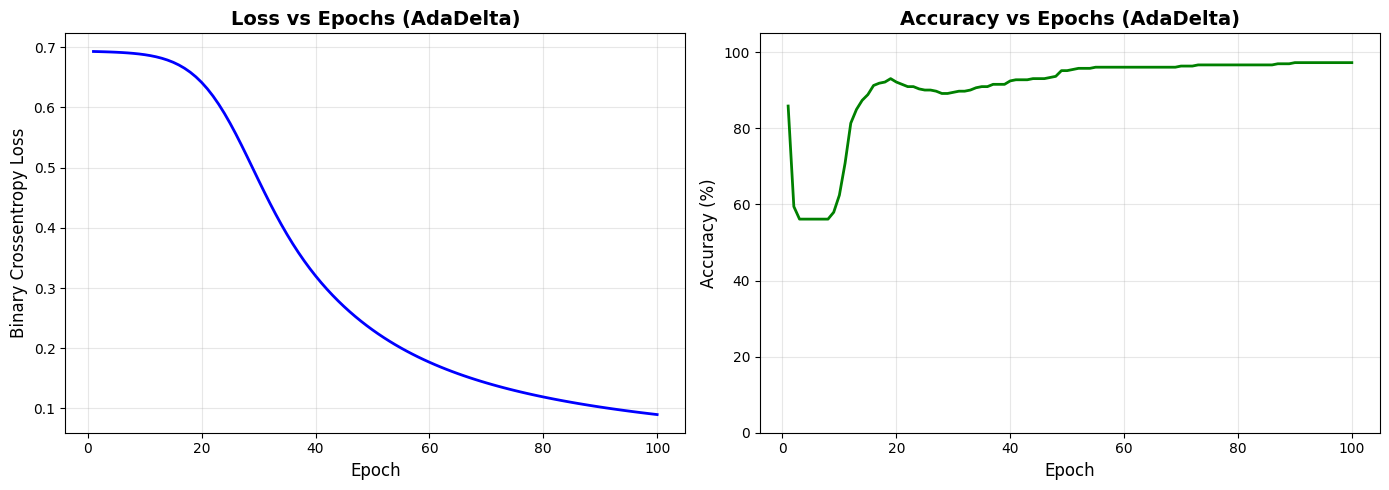


Training Summary:
Accuracy improved from 85.89% to 97.30%
Loss decreased from 0.692924 to 0.089772


In [13]:
# Plot Accuracy vs Epoch
plt.figure(figsize=(14, 5))

# Plot 1: Loss vs Epochs
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_history) + 1), loss_history, linewidth=2, color='blue')
plt.title('Loss vs Epochs (AdaDelta)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Binary Crossentropy Loss', fontsize=12)
plt.grid(True, alpha=0.3)

# Plot 2: Accuracy vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, linewidth=2, color='green')
plt.title('Accuracy vs Epochs (AdaDelta)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim([0, 105])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTraining Summary:")
print(f"Accuracy improved from {accuracy_history[0]:.2f}% to {accuracy_history[-1]:.2f}%")
print(f"Loss decreased from {loss_history[0]:.6f} to {loss_history[-1]:.6f}")

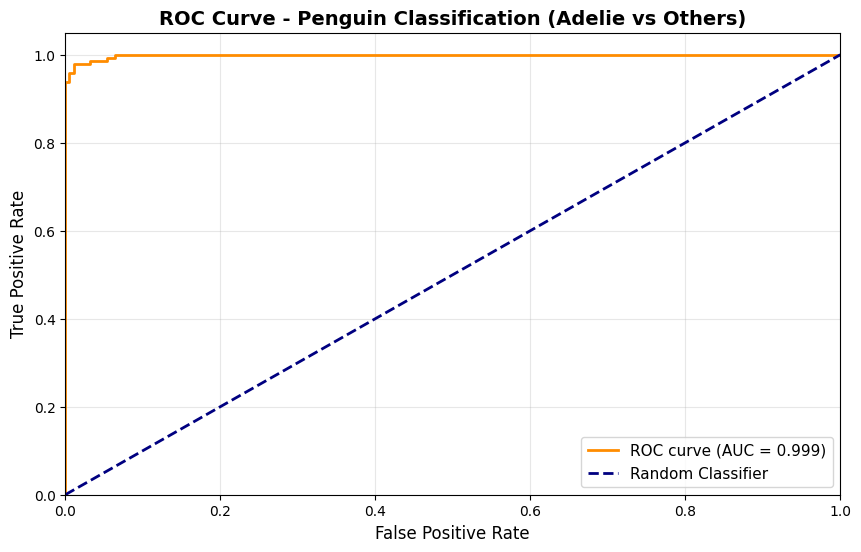


ROC AUC Score: 0.9986
Model Performance: Excellent


In [14]:

# Plot ROC AUC Curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get probability predictions on training data
y_pred_proba, _ = forward_pass(X_penguin, trained_params['W1'], trained_params['b1'], 
                               trained_params['W2'], trained_params['b2'])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_penguin, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Penguin Classification (Adelie vs Others)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")
print(f"Model Performance: {'Excellent' if roc_auc >= 0.9 else 'Good' if roc_auc >= 0.8 else 'Fair' if roc_auc >= 0.7 else 'Poor'}")
